In [1]:
full_name = "Artemenko_Yevhenii"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

plt.style.use("seaborn")

D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_16888\3351410028.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


**Features in the dataset**

ID: Unique ID of the record\
Customer_ID: Unique ID of the customer\
Month: Month of the year\
Name: The name of the person\
Age: The age of the person\
SSN: Social Security Number of the person\
Occupation: The occupation of the person\
Annual_Income: The Annual Income of the person\
Monthly_Inhand_Salary: Monthly in-hand salary of the person\
Num_Bank_Accounts: The number of bank accounts of the person\
Num_Credit_Card: Number of credit cards the person is having\
Interest_Rate: The interest rate on the credit card of the person\
Num_of_Loan: The number of loans taken by the person from the bank\
Type_of_Loan: The types of loans taken by the person from the bank\
Delay_from_due_date: The average number of days delayed by the person from the date of payment\
Num_of_Delayed_Payment: Number of payments delayed by the person\
Changed_Credit_Card: The percentage change in the credit card limit of the person\
Num_Credit_Inquiries: The number of credit card inquiries by the person\
Credit_Mix: Classification of Credit Mix of the customer\
Outstanding_Debt: The outstanding balance of the person\
Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer\
Credit_History_Age: The age of the credit history of the person\
Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.\
Total_EMI_per_month: The total EMI per month of the person\
Amount_invested_monthly: The monthly amount invested by the person\
Payment_Behaviour: The payment behaviour of the person\
Monthly_Balance: The monthly balance left in the account of the person\
Credit_Score: The credit score of the person

**answers.csv**

| ID | Credit_Score |
|----------|----------|
| 0    | Good   |
| 1    | Poor  |
| 2    | Standard   |

In [3]:
train_df = pd.read_csv("train.csv", index_col="ID")
test_df = pd.read_csv("test.csv", index_col="ID")
print(train_df.shape, test_df.shape)
train_df.head()

(80000, 27) (20000, 26)


,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
21034,11711,5,Abhishek Vishnoiw,51.0,370512390.0,Musician,101583.48,8648.290000,5.0,7.0,...,Standard,50.93,34.462154,289.0,No,190.811017,61.059177,Low_spent_Large_value_payments,314.002193,Standard
24721,33127,8,Freifeldu,23.0,721850529.0,Writer,101926.95,8635.912500,4.0,4.0,...,Standard,1058.00,39.693812,245.0,No,70.587681,165.540620,Low_spent_Medium_value_payments,410.199642,Standard
52063,14859,2,Huwo,49.0,618962558.0,Writer,158871.12,12962.260000,0.0,4.0,...,Good,576.48,39.367225,228.0,No,86.905860,161.046502,Low_spent_Medium_value_payments,742.514154,Standard
97724,39499,3,Alex Dobuzinskiso,40.0,817314270.0,Doctor,60379.28,4427.498453,5.0,6.0,...,Standard,725.39,29.061701,205.0,NM,90.906385,125.769289,High_spent_Medium_value_payments,473.135623,Standard
140723,9530,6,Jasone,17.0,580534920.0,Accountant,50050.83,4085.902500,9.0,10.0,...,Bad,3419.10,30.386321,54.0,Yes,190.445060,43.048082,High_spent_Large_value_payments,401.355749,Poor


# EDA

### 1. Data understanding

Для початку переглянемо тип даних кожної змінної та експліцитні пропуски.

In [4]:
display(
    train_df.info(),
    print(),
)

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 21034 to 145090
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  int64  
 1   Month                     80000 non-null  int64  
 2   Name                      80000 non-null  object 
 3   Age                       80000 non-null  float64
 4   SSN                       80000 non-null  float64
 5   Occupation                80000 non-null  object 
 6   Annual_Income             80000 non-null  float64
 7   Monthly_Inhand_Salary     80000 non-null  float64
 8   Num_Bank_Accounts         80000 non-null  float64
 9   Num_Credit_Card           80000 non-null  float64
 10  Interest_Rate             80000 non-null  float64
 11  Num_of_Loan               80000 non-null  float64
 12  Type_of_Loan              80000 non-null  object 
 13  Delay_from_due_date       80000 non-null  float64
 14  Num_of

None

None

In [5]:
display(
    train_df.describe(exclude=np.number).T
)

,count,unique,top,freq
Name,80000,10128,Stevex,40
Occupation,80000,15,Lawyer,5692
Type_of_Loan,80000,6261,No Data,9157
Credit_Mix,80000,3,Standard,36699
Payment_of_Min_Amount,80000,3,Yes,41857
Payment_Behaviour,80000,6,Low_spent_Small_value_payments,22968
Credit_Score,80000,3,Standard,42539


З цих таблицсь ми можемо зробити такі висновки:


1.   Пропуски в даних позначені рядком "No Data";
2.   Більшість осіб сплатили мінімальну суму;
3.   У більшості осіб в кредитний рейтинг - Standart;
4.   Більшість людей, що зверталися за позикою - юристи.




In [6]:
train_df.isna().sum()

Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### 2. Data examining

Спочатку перевіряю наявність дублікатів в тренувальному датасеті.

In [7]:
train_df[train_df.duplicated()]
# test_df[test_df.duplicated()]

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,


Далі перевіряю, які унікальні значення є серед категоріальних даних.

In [8]:
object_columns = train_df.describe(include='O').columns

for column in object_columns:
  print("------------------------------")
  print(f"Кількість унікальних значень змінної {column}:", train_df[column].nunique())
  print(train_df[column].unique())


------------------------------
Кількість унікальних значень змінної Name: 10128
['Abhishek Vishnoiw' 'Freifeldu' 'Huwo' ... 'John Acherd' 'Alisterd'
 'Cremere']
------------------------------
Кількість унікальних значень змінної Occupation: 15
['Musician' 'Writer' 'Doctor' 'Accountant' 'Engineer' 'Manager'
 'Media_Manager' 'Teacher' 'Developer' 'Architect' 'Mechanic' 'Journalist'
 'Lawyer' 'Entrepreneur' 'Scientist']
------------------------------
Кількість унікальних значень змінної Type_of_Loan: 6261
['Payday Loan, Student Loan, Payday Loan, and Debt Consolidation Loan'
 'Mortgage Loan' 'Home Equity Loan' ...
 'Personal Loan, Mortgage Loan, Not Specified, Auto Loan, Debt Consolidation Loan, Credit-Builder Loan, and Auto Loan'
 'Credit-Builder Loan, Auto Loan, Debt Consolidation Loan, and Personal Loan'
 'Debt Consolidation Loan, Auto Loan, Debt Consolidation Loan, and Auto Loan']
------------------------------
Кількість унікальних значень змінної Credit_Mix: 3
['Standard' 'Good' 'Bad

Тепер я проводжу уніфікацію пропусків у датасеті.

In [9]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

train_df = train_df.applymap(text_cleaning).replace(['', 'NaN','No Data', 'nan'], np.NaN)

print(train_df.isna().sum())

train_df.Type_of_Loan = train_df.Type_of_Loan.fillna(train_df.Type_of_Loan.mode()[0])

D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_16888\258346291.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_df = train_df.applymap(text_cleaning).replace(['', 'NaN','No Data', 'nan'], np.NaN)


Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                9157
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64


Оскільки найбільша кількість пропусків у категоріальної змінної Type_of_Loan, я замінюю їх модою. Те ж саме роблю для тестової вибірки.

In [10]:
test_df = test_df.applymap(text_cleaning).replace(['', 'NaN','No Data', 'nan'], np.NaN)

print(test_df.isna().sum())

test_df.Type_of_Loan = test_df.Type_of_Loan.fillna(test_df.Type_of_Loan.mode()[0])

D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_16888\641494619.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_df = test_df.applymap(text_cleaning).replace(['', 'NaN','No Data', 'nan'], np.NaN)


Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                2251
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64


### 3. Plotting data

d:\Users\Евгений Артёменко\PycharmProjects\Projects\neural_networks\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\Евгений Артёменко\PycharmProjects\Projects\neural_networks\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\Евгений Артёменко\PycharmProjects\Projects\neural_networks\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\Евгений Артёменко\PycharmProjects\Projects\neural

<Axes: xlabel='Total_EMI_per_month', ylabel='Count'>

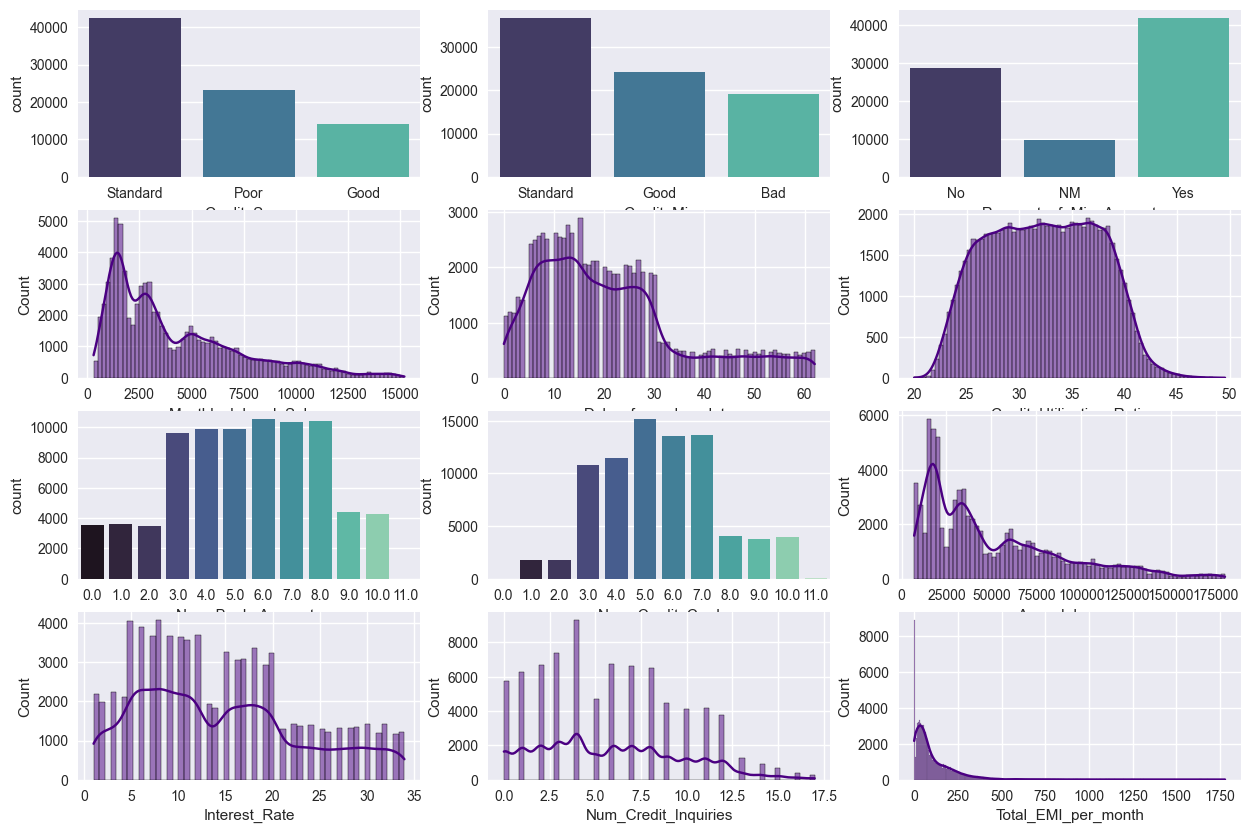

In [11]:
figure, ax = plt.subplots(4, 3, figsize=(15, 10))

sns.countplot(data=train_df, x=train_df.Credit_Score, ax=ax[0, 0], palette="mako")
sns.countplot(data=train_df, x=train_df.Credit_Mix, ax=ax[0, 1], palette="mako")
sns.countplot(
    data=train_df, x=train_df.Payment_of_Min_Amount, ax=ax[0, 2], palette="mako"
)

sns.histplot(data=train_df, x=train_df.Monthly_Inhand_Salary, ax=ax[1, 0], kde=True, color="indigo")
sns.histplot(data=train_df, x=train_df.Delay_from_due_date, ax=ax[1, 1], kde=True, color="indigo")
sns.histplot(data=train_df, x=train_df.Credit_Utilization_Ratio, ax=ax[1, 2], kde=True, color="indigo")

sns.countplot(data=train_df, x=train_df.Num_Bank_Accounts, ax=ax[2, 0], palette="mako")
sns.countplot(data=train_df, x=train_df.Num_Credit_Card, ax=ax[2, 1], palette="mako")
sns.histplot(data=train_df, x=train_df.Annual_Income, ax=ax[2, 2], kde=True, color="indigo")

sns.histplot(data=train_df, x=train_df.Interest_Rate, ax=ax[3, 0], kde=True, color="indigo")
sns.histplot(data=train_df, x=train_df.Num_Credit_Inquiries, ax=ax[3, 1], kde=True, color="indigo")
sns.histplot(data=train_df, x=train_df.Total_EMI_per_month, ax=ax[3, 2], kde=True, color="indigo")

**Висновки щодо EDA**

1. Змінна Type_of_Loan мала багато пропусків в навчальному та тренувальному датасеті, вони були замінені модою по змінній;
2. Змінна Payment_of_Min_Аmount має нормальний розподіл;
3. Майже всі чисельні змінні мають багато викидів;
4. Розподіл більшості даних відмінний від нормального, отже змінні потребують нормалізації.

# Data preprocessing

### 1. Encoding

**Type_of_Loan**

Проаналізувавши змінну Type_of_Loan я прийшов до висновку, що лише 9 перших значення є унікальними:
- 'Not Specified',
- 'Debt Consolidation Loan',
- 'Personal Loan',
- 'Credit-Builder Loan',
- 'Student Loan',
- 'Payday Loan',
- 'Auto Loan',
- 'Mortgage Loan',
- 'Home Equity Loan',
- 'Personal Loan, and Student Loan',
- 'Student Loan, and Payday Loan'

Всі інші значення є комбінаціями вищезазначених. Тому я створюю дев'ять нових змінних, що будуть відповідати основним типам позик. Змінну Type_of_Loan я видаляю, а новостворені заповнюю значеннями 0 та 1.

In [12]:
for i in train_df.Type_of_Loan.value_counts().head(9).index[1:] :
    train_df[i] = train_df.Type_of_Loan.str.contains(i)
    train_df[i] = train_df[i].replace({False: 0, True: 1})
del train_df["Type_of_Loan"]

for i in test_df.Type_of_Loan.value_counts().head(9).index[1:] :
    test_df[i] = test_df.Type_of_Loan.str.contains(i)
    test_df[i] = test_df[i].replace({False: 0, True: 1})
del test_df["Type_of_Loan"]

train_df.head(3)

D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_16888\2529273901.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[i] = train_df[i].replace({False: 0, True: 1})
D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_16888\2529273901.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[i] = train_df[i].replace({False: 0, True: 1})
D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_16888\2529273901.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ve

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Student Loan,Personal Loan,Debt Consolidation Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
ID,,,,,,,,,,,,,,,,,,,,,
21034,11711,5,Abhishek Vishnoiw,51.0,370512390.0,Musician,101583.48,8648.2900,5.0,7.0,...,314.002193,Standard,0,1,0,1,1,0,0,0
24721,33127,8,Freifeldu,23.0,721850529.0,Writer,101926.95,8635.9125,4.0,4.0,...,410.199642,Standard,0,0,0,0,0,1,0,0
52063,14859,2,Huwo,49.0,618962558.0,Writer,158871.12,12962.2600,0.0,4.0,...,742.514154,Standard,0,0,0,0,0,0,0,1


**Payment_of_Min_Amount**

Категоріальну змінну Payment_of_Min_Amount, що містить значення No, NM, Yes я замінюю на -1, 0 та 1

In [13]:
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].replace({"No": -1, "NM": 0, "Yes": 1})
test_df['Payment_of_Min_Amount'] = test_df['Payment_of_Min_Amount'].replace({"No": -1, "NM": 0, "Yes": 1})

D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_16888\2044972668.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].replace({"No": -1, "NM": 0, "Yes": 1})
D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_16888\2044972668.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Payment_of_Min_Amount'] = test_df['Payment_of_Min_Amount'].replace({"No": -1, "NM": 0, "Yes": 1})


**Payment_Behaviour**

In [14]:
label_encoder = LabelEncoder()
train_df["Payment_Behaviour"] = label_encoder.fit_transform(train_df["Payment_Behaviour"])
test_df["Payment_Behaviour"] = label_encoder.fit_transform(test_df["Payment_Behaviour"])

train_df["Payment_Behaviour"].unique()

array([3, 4, 1, 0, 5, 2])

**Occupation**

При кодуванні змінної Occupation я вирішив застосувати загальноприйняті представлення про економічний стан кожної з професій. Тому я розмістив їх в порядку збільшення та замінив відповідним значенням від 1 до 15.

In [15]:
occupation_mapping = {
    'Mechanic': 1,
    'Teacher': 2,
    'Writer': 3,
    'Journalist': 4,
    'Musician': 5,
    'Manager': 6,
    'Media_Manager': 7,
    'Scientist': 8,
    'Accountant': 9,
    'Entrepreneur': 10,
    'Developer': 11,
    'Architect': 12,
    'Engineer': 13,
    'Lawyer': 14,
    'Doctor': 15
}

train_df['Occupation'] = train_df['Occupation'].replace(occupation_mapping)
test_df['Occupation'] = test_df['Occupation'].replace(occupation_mapping)

D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_16888\3022913500.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Occupation'] = train_df['Occupation'].replace(occupation_mapping)
D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_16888\3022913500.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Occupation'] = test_df['Occupation'].replace(occupation_mapping)


**Credit_Mix**

In [16]:
train_df['Credit_Mix'] = train_df['Credit_Mix'].map({"Bad": -1, "Standard": 0, "Good": 1})
test_df['Credit_Mix'] = test_df['Credit_Mix'].map({"Bad": -1, "Standard": 0, "Good": 1})

**Credit_Score**

In [17]:
train_df['Credit_Score'] = train_df['Credit_Score'].map({"Poor": -1, "Standard": 0, "Good": 1})

In [18]:
del train_df['Name']
del train_df['SSN']

del test_df['Name']
del test_df['SSN']

### 2. Data oversampling

Перед розбивкою даних на тренувальну та валідаціну вибірки я вирішив переконатися, наскільки явно виражений дисбаланс класів в датасеті. Виявилося, що дисбаланс в датасеті значний, тому я вирішив скористатися методом SMOTE для генерації нових даних, щоб вирівняти пропорцію класів.

In [19]:
# Змінна Credit_Score містила один NaN, тому я видаляю цей запис
train_df["Credit_Score"][train_df["Credit_Score"].isna()]
train_df = train_df.drop(train_df[pd.isna(train_df['Credit_Score'])].index)

In [20]:
X, y = train_df.drop("Credit_Score",axis=1).values , train_df["Credit_Score"]
print(y.value_counts(normalize=True))

oversampling = SMOTE(sampling_strategy='auto')
X, y = oversampling.fit_resample(X, y)

print("---------------")
print(y.value_counts(normalize=True))

Credit_Score
 0    0.531737
-1    0.289988
 1    0.178275
Name: proportion, dtype: float64
---------------
Credit_Score
 0    0.333333
-1    0.333333
 1    0.333333
Name: proportion, dtype: float64


### 3. Splitting data

In [21]:
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(89331, 31) (89331,)
(38286, 31) (38286,)


In [22]:
X_test = test_df.values
type(X_test)

numpy.ndarray

### 4. Normalization

Як показав аналіз розподілу даних - більшість змінних мають розподіл відмінний від нормального. Саме тому нам необхідно використовувати нормалізацію для масштабування ознак.

In [23]:
mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_val = mms.fit_transform(X_val)
X_test = mms.fit_transform(X_test)

# Modeling

Тепер я проводжу первинні випробування кожної з моделей. Та модель, яка покаже найращий результат буде в подальшому використовуватися для фінальної класифікації.

**Метрика**

Оскільки надання кредиту людині є відповідальною справою, банк не може собі дозволити часто помилятися, надаючи гроші неплатоспроможним суб'єктам.
**Отже задачею моделі є мінімізація False Negative класифікацій при передбаченні низького ретингу**. Тому в якості основної метрики я буду використовувати **recall**.

### 1. LogisticRegression

In [ ]:
# baseline
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)

lr_pred = logistic_model.predict(X_val)

print("Результат роботи первинної моделі LogisticRegression:")
print(classification_report(y_val, lr_pred))

Результат роботи первинної моделі LogisticRegression:
              precision    recall  f1-score   support

        -1.0       0.74      0.68      0.71      4955
         0.0       0.67      0.58      0.62      4880
         1.0       0.70      0.86      0.77      4912

    accuracy                           0.71     14747
   macro avg       0.70      0.70      0.70     14747
weighted avg       0.70      0.71      0.70     14747



Далі підберемо гіперпараметри, для побудови найточнішої моделі.

In [ ]:
search_space = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['liblinear', 'saga']
}

lr_gs = LogisticRegression()

GS = GridSearchCV(
    estimator=lr_gs,
    param_grid=search_space,
    scoring=["accuracy", 'recall_micro', 'f1_micro'],
    refit="recall_micro",
    cv=5,
    verbose=4
)

GS.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear; accuracy: (test=0.706) f1_micro: (test=0.706) recall_micro: (test=0.706) total time=   3.0s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear; accuracy: (test=0.699) f1_micro: (test=0.699) recall_micro: (test=0.699) total time=   2.2s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear; accuracy: (test=0.693) f1_micro: (test=0.693) recall_micro: (test=0.693) total time=   1.2s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear; accuracy: (test=0.702) f1_micro: (test=0.702) recall_micro: (test=0.702) total time=   1.2s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear; accuracy: (test=0.702) f1_micro: (test=0.702) recall_micro: (test=0.702) total time=   1.3s
[CV 1/5] END C=0.01, penalty=l1, solver=saga; accuracy: (test=0.711) f1_micro: (test=0.711) recall_micro: (test=0.711) total time=   0.8s
[CV 2/5] END C=0.01, penalty=l1, solver=saga; accuracy: (test=0.709) f1_micro: (test=0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, penalty=l1, solver=saga; accuracy: (test=0.705) f1_micro: (test=0.705) recall_micro: (test=0.705) total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, penalty=l1, solver=saga; accuracy: (test=0.703) f1_micro: (test=0.703) recall_micro: (test=0.703) total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, penalty=l1, solver=saga; accuracy: (test=0.700) f1_micro: (test=0.700) recall_micro: (test=0.700) total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, penalty=l1, solver=saga; accuracy: (test=0.707) f1_micro: (test=0.707) recall_micro: (test=0.707) total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, penalty=l1, solver=saga; accuracy: (test=0.704) f1_micro: (test=0.704) recall_micro: (test=0.704) total time=   5.4s
[CV 1/5] END C=1, penalty=l2, solver=liblinear; accuracy: (test=0.707) f1_micro: (test=0.707) recall_micro: (test=0.707) total time=   1.1s
[CV 2/5] END C=1, penalty=l2, solver=liblinear; accuracy: (test=0.707) f1_micro: (test=0.707) recall_micro: (test=0.707) total time=   1.2s
[CV 3/5] END C=1, penalty=l2, solver=liblinear; accuracy: (test=0.698) f1_micro: (test=0.698) recall_micro: (test=0.698) total time=   1.4s
[CV 4/5] END C=1, penalty=l2, solver=liblinear; accuracy: (test=0.708) f1_micro: (test=0.708) recall_micro: (test=0.708) total time=   1.2s
[CV 5/5] END C=1, penalty=l2, solver=liblinear; accuracy: (test=0.703) f1_micro: (test=0.703) recall_micro: (test=0.703) total time=   1.5s
[CV 1/5] END C=1, penalty=l2, solver=saga; accuracy: (test=0.706) f1_micro: (test=0.706) recall_micro: (test=0.706) total time=   1.6s
[CV 2/5] END C=1, penalty=l2, 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             refit='recall_micro',
             scoring=['accuracy', 'recall_micro', 'f1_micro'], verbose=4)

In [ ]:
GS.best_estimator_

LogisticRegression(C=0.01, solver='saga')

In [ ]:
lr_best = LogisticRegression(C=0.01, solver="saga")
lr_best.fit(X_train, y_train)

lr_pred = lr_best.predict(X_val)

print("Результат роботи моделі LogisricRegression з найкращою архітектурою:")
print(classification_report(y_val, lr_pred))

Результат роботи моделі LogisricRegression з найкращою архітектурою:
              precision    recall  f1-score   support

        -1.0       0.74      0.70      0.72      4955
         0.0       0.69      0.57      0.62      4880
         1.0       0.69      0.85      0.77      4912

    accuracy                           0.71     14747
   macro avg       0.71      0.71      0.70     14747
weighted avg       0.71      0.71      0.70     14747



**Висновок:** Оскільки основною метрикою був обраний recall, ми оцінюємо модель за значенням **0.70** для передбачення низького кредитного рейтингу суб'єкта. На жаль, воно нижче заданого порогу в **0.8**.  Значення accuracy - **0.71**, що також є незадовільним результатом. Отже використовувати логістичну регресію для фінальної класифікації я не буду.

### 2. KNeighborsClassifier

In [ ]:
# baseline
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_val)

print("Результат роботи моделі KNeighborsClassifier:")
print(classification_report(y_val, knn_pred))

Результат роботи моделі KNeighborsClassifier:
              precision    recall  f1-score   support

        -1.0       0.76      0.83      0.79      4955
         0.0       0.76      0.59      0.67      4880
         1.0       0.79      0.89      0.83      4912

    accuracy                           0.77     14747
   macro avg       0.77      0.77      0.77     14747
weighted avg       0.77      0.77      0.77     14747



Далі підберемо гіперпараметри, для побудови найточнішої моделі.

In [ ]:
search_space = {
    "n_neighbors": [3, 6, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_gs = KNeighborsClassifier()

GS = GridSearchCV(
    estimator=knn_gs,
    param_grid=search_space,
    scoring=["accuracy", 'recall_micro', 'f1_micro'],
    refit="recall_micro",
    cv=5,
    verbose=4
)

In [ ]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform; accuracy: (test=0.778) f1_micro: (test=0.778) recall_micro: (test=0.778) total time=   2.6s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform; accuracy: (test=0.771) f1_micro: (test=0.771) recall_micro: (test=0.771) total time=   2.7s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform; accuracy: (test=0.777) f1_micro: (test=0.777) recall_micro: (test=0.777) total time=   3.7s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform; accuracy: (test=0.781) f1_micro: (test=0.781) recall_micro: (test=0.781) total time=   2.2s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform; accuracy: (test=0.773) f1_micro: (test=0.773) recall_micro: (test=0.773) total time=   1.5s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance; accuracy: (test=0.802) f1_micro: (test=0.802) recall_micro: (test=0.802) total time=   1.2s
[CV 2/5]

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 6, 9],
                         'weights': ['uniform', 'distance']},
             refit='recall_micro',
             scoring=['accuracy', 'recall_micro', 'f1_micro'], verbose=4)

In [ ]:
GS.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
knn_best.fit(X_train, y_train)

knn_pred = knn_best.predict(X_val)

print("Результат роботи моделі KNeighborsClassifier з найкращою архітектурою:")
print(classification_report(y_val, knn_pred))

Результат роботи моделі KNeighborsClassifier з найкращою архітектурою:
              precision    recall  f1-score   support

        -1.0       0.84      0.88      0.86      4955
         0.0       0.83      0.72      0.77      4880
         1.0       0.86      0.94      0.90      4912

    accuracy                           0.85     14747
   macro avg       0.84      0.85      0.84     14747
weighted avg       0.84      0.85      0.84     14747



**Висновок:**
Оскільки основною метрикою був обраний recall, можна вважати, що дана конфігурація моделі демонструє найкращий результат - **0.88** для передбачення низького кредитного рейтингу суб'єкта.

### 3. DecisionTreeClassifier

In [ ]:
# baseline
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

dtree_pred = dtree.predict(X_val)

print("Результат роботи первинної моделі DecisionTreeClassifier:")
print(classification_report(y_val, dtree_pred))

Результат роботи первинної моделі DecisionTreeClassifier:
              precision    recall  f1-score   support

        -1.0       0.75      0.74      0.74      4955
         0.0       0.68      0.68      0.68      4880
         1.0       0.79      0.80      0.79      4912

    accuracy                           0.74     14747
   macro avg       0.74      0.74      0.74     14747
weighted avg       0.74      0.74      0.74     14747



Перш за все я фіксую базові гіперпараметри первинної моделі, щоб мінімізувати час дослідження за допомогою Grid Search.

In [ ]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
search_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10],
}

dtree_gs = DecisionTreeClassifier()

GS = GridSearchCV(
    estimator=dtree_gs,
    param_grid=search_space,
    scoring=["accuracy", 'recall_micro', 'f1_micro'],
    refit="recall_micro",
    cv=5,
    verbose=4
)

GS.fit(X_train, y_train)

In [ ]:
GS.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

In [ ]:
dtree_best = DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
dtree_best.fit(X_train, y_train)

dtree_pred = dtree_best.predict(X_val)

print("Результат роботи моделі DecisionTreeClassifier з найкращою архітектурою:")
print(classification_report(y_val, dtree_pred))

Результат роботи моделі DecisionTreeClassifier з найкращою архітектурою:
              precision    recall  f1-score   support

        -1.0       0.73      0.75      0.74      4955
         0.0       0.69      0.67      0.68      4880
         1.0       0.78      0.78      0.78      4912

    accuracy                           0.73     14747
   macro avg       0.73      0.73      0.73     14747
weighted avg       0.73      0.73      0.73     14747



**Висновок:** Оскільки основною метрикою був обраний recall, ми оцінюємо модель за значенням **0.75** для передбачення низького кредитного рейтингу суб'єкта. На жаль, воно нижче заданого порогу в **0.8**.  Значення accuracy - **0.73**, що також є незадовільним результатом. Після пошуку оптимальних гіперпараметрів точність моделі підвищилася, проте недостатньо. Отже використовувати DecisionTreeClassifier для фінальної класифікації я не буду.

### 4. RandomForestClassifier

In [ ]:
feat_labels =train_df.columns[1:]
rf = RandomForestClassifier(n_estimators=800, random_state=1)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_val)

print("Результат роботи первинної моделі RandomForestClassifier:")
print(classification_report(y_val, rf_pred))

Результат роботи первинної моделі RandomForestClassifier:
              precision    recall  f1-score   support

        -1.0       0.86      0.85      0.85      4955
         0.0       0.84      0.74      0.79      4880
         1.0       0.83      0.93      0.87      4912

    accuracy                           0.84     14747
   macro avg       0.84      0.84      0.84     14747
weighted avg       0.84      0.84      0.84     14747



Оскільки модель RandomForestClassifier дозволяє оцінити вплив кожної змінної на результат класифікації, я вирішив продемонструвати це на наступній гістрограмі.

 1) Outstanding_Debt               0.117677
 2) Credit_Utilization_Ratio       0.091090
 3) Num_of_Loan                    0.082403
 4) Num_of_Delayed_Payment         0.058589
 5) Payment_of_Min_Amount          0.048014
 6) Credit_Mix                     0.042133
 7) Total_EMI_per_month            0.041675
 8) Num_Credit_Inquiries           0.041296
 9) Interest_Rate                  0.037093
10) Num_Credit_Card                0.034582
11) Changed_Credit_Limit           0.032709
12) Age                            0.032071
13) Credit_Score                   0.029193
14) Amount_invested_monthly        0.027977
15) Monthly_Inhand_Salary          0.027696
16) Credit_History_Age             0.027695
17) Month                          0.027555
18) Num_Bank_Accounts              0.027167
19) Payment_Behaviour              0.026734
20) Occupation                     0.025582
21) Delay_from_due_date            0.025461
22) Annual_Income                  0.020877
23) Monthly_Balance             

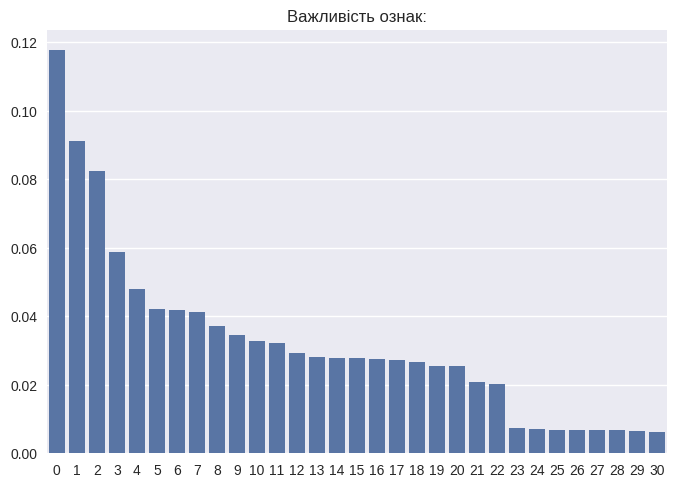

In [ ]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importance[indices[f]]))

plt.title('Важливість ознак:')
sns.barplot(x=range(X_train.shape[1]), y=importance[indices])
plt.show()

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

Тепер я застосую Grid Search для пошуку оптимальних гіперпараметрів.

In [ ]:
search_space = {
    'n_estimators': [500, 800, 1000],
}

rf_gs = RandomForestClassifier()

GS = GridSearchCV(
    estimator=rf_gs,
    param_grid=search_space,
    scoring=["accuracy", 'recall_micro', 'f1_micro'],
    refit="recall_micro",
    cv=5,
    verbose=4
)

GS.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END n_estimators=500; accuracy: (test=0.834) f1_micro: (test=0.834) recall_micro: (test=0.834) total time= 1.1min
[CV 2/5] END n_estimators=500; accuracy: (test=0.835) f1_micro: (test=0.835) recall_micro: (test=0.835) total time= 1.1min
[CV 3/5] END n_estimators=500; accuracy: (test=0.832) f1_micro: (test=0.832) recall_micro: (test=0.832) total time= 1.1min
[CV 4/5] END n_estimators=500; accuracy: (test=0.841) f1_micro: (test=0.841) recall_micro: (test=0.841) total time= 1.1min
[CV 5/5] END n_estimators=500; accuracy: (test=0.833) f1_micro: (test=0.833) recall_micro: (test=0.833) total time= 1.1min
[CV 1/5] END n_estimators=800; accuracy: (test=0.833) f1_micro: (test=0.833) recall_micro: (test=0.833) total time= 1.7min
[CV 2/5] END n_estimators=800; accuracy: (test=0.834) f1_micro: (test=0.834) recall_micro: (test=0.834) total time= 1.7min
[CV 3/5] END n_estimators=800; accuracy: (test=0.833) f1_micro: (test=0.833) re

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [500, 800, 1000]},
             refit='recall_micro',
             scoring=['accuracy', 'recall_micro', 'f1_micro'], verbose=4)

In [ ]:
GS.best_estimator_

RandomForestClassifier(n_estimators=500)

In [ ]:
rf_best = RandomForestClassifier(n_estimators=500)
rf_best.fit(X_train, y_train)

rf_pred = rf_best.predict(X_val)

print("Результат роботи моделі RandomForestClassifier з найкращою архітектурою:")
print(classification_report(y_val, rf_pred))

Результат роботи моделі RandomForestClassifier з найкращою архітектурою:
              precision    recall  f1-score   support

        -1.0       0.86      0.85      0.85      4955
         0.0       0.84      0.74      0.79      4880
         1.0       0.83      0.93      0.87      4912

    accuracy                           0.84     14747
   macro avg       0.84      0.84      0.84     14747
weighted avg       0.84      0.84      0.84     14747



### 5. **Modeling colclusion**

Під час етапу моделювання я порівнював чотири алгоритми класифікації:
1. Логістичну регресію
2. Метод К-найближчих сусідів
3. Дерево рішень
4. Випадкові ліси

Найращий результат показали моделі RandomForestClassifier (recall = 0.85) та KNeighborsClassifier (recall = 0.88) на валідаційній вибірці. Тому я приймаю рішення використовувати KNeighborsClassifier в оптимальній конфігурації для фінальної класифікації.  

# Final prediction

In [24]:
knn_final_model = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
knn_final_model.fit(X_train, y_train)

knn_final_predict = knn_final_model.predict(X_test)

In [26]:
knn_final_predict = pd.DataFrame(knn_final_predict)

In [30]:
knn_final_predict.index = test_df.index

In [33]:
knn_final_predict = knn_final_predict.replace({-1: "Poor", 0: "Standard", 1: "Good"})

In [35]:
knn_final_predict.to_csv(f'answers_{full_name}.csv')